# Lista 7
### Zuzanna Sosnowska

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pygments.styles.dracula import yellow

In [2]:
def euler_method(func, point, h, n):
    x0, y0 = point
    xs = [x0]
    ys = [y0]
    x, y = x0, y0
    for i in range(n):
        y_new = y + h * func(x, y)
        x = x + h
        y = y_new
        xs.append(x)
        ys.append(y)
    return xs, ys


def runge_kutta_2nd_order(func, point, h, n):
    x0, y0 = point
    xs = [x0]
    ys = [y0]
    x, y = x0, y0
    for i in range(n):
        k1 = h * func(x, y)
        y_new = y + h * func(x + 0.5 * h, y + 0.5 * k1)
        x = x + h
        y = y_new
        xs.append(x)
        ys.append(y)
    return xs, ys


def runge_kutta_4th_order(func, point, h, n):
    x0, y0 = point
    xs = [x0]
    ys = [y0]
    x, y = x0, y0
    for i in range(n):
        k1 = h * func(x, y)
        k2 = h * func(x + 0.5 * h, y + 0.5 * k1)
        k3 = h * func(x + 0.5 * h, y + 0.5 * k2)
        k4 = h * func(x + h, y + k3)
        dy = 1 / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
        y_new = y + dy
        x = x + h
        y = y_new
        xs.append(x)
        ys.append(y)
    return xs, ys

### Zadanie 1

#### Cel zadania

Celem zadania było porównanie dokładności różnych metod numerycznych stosowanych do rozwiązywania równań różniczkowych zwyczajnych: metody Eulera, metody Rungego-Kutty drugiego rzędu (`runge_kutta_2nd_order`) oraz metody Rungego-Kutty czwartego rzędu (`runge_kutta_4th_order`). Sprawdzano, jak liczba kroków czasowych (1, 2 i 4 kroki) wpływa na dokładność rozwiązania w punkcie , porównując wyniki z rozwiązaniem analitycznym.

Rozważaliśmy równanie:

$$ y'(x) + 4y = x, y(0) = 1 $$

Z rozwiązaniem analitycznym:

$$ \frac{31}{32} e^{4x} + \frac{1}{4} x^2 - \frac{1}{8} x + \frac{1}{32} $$

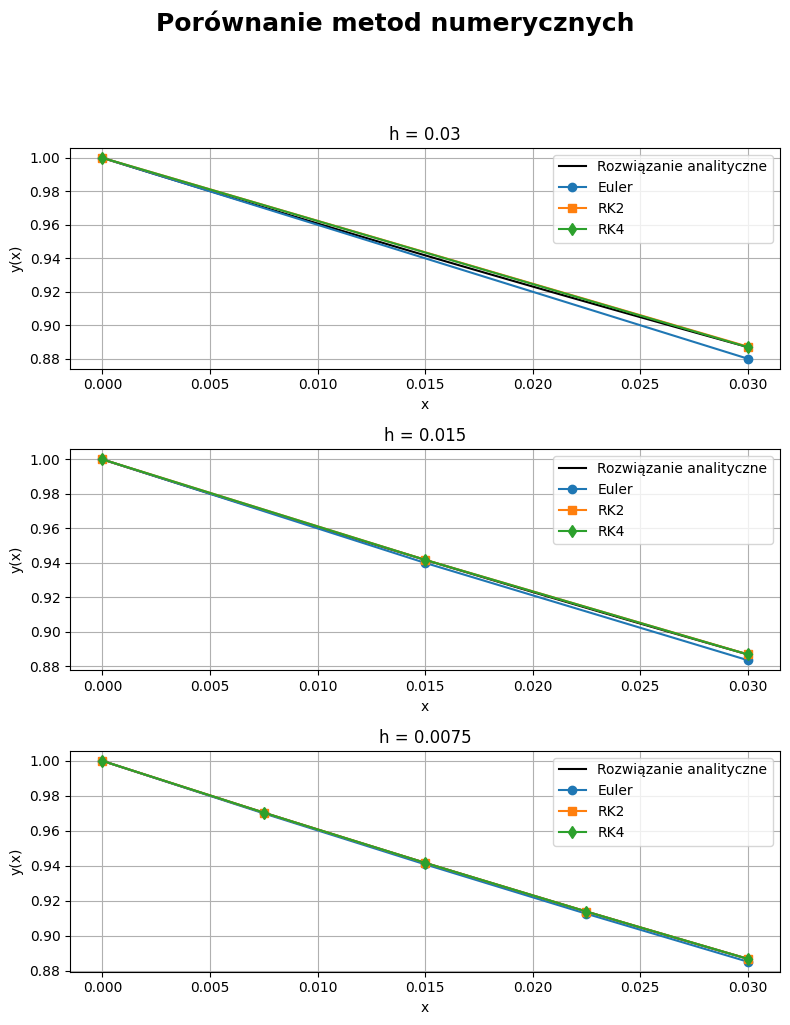

In [3]:
def analytical_solution(x):
    return (31 / 32) * np.exp(-4 * x) + 0.25 * np.power(x, 2) - 0.125 * x + (1 / 32)

def f(x, y):
    return np.power(x, 2) - 4 * y

stop = 0.03
h1 = stop
h2 = stop / 2
h4 = stop / 4
h300 = stop / 300
point = 0, 1
euler_sol1 = euler_method(f, point, h1, 1)
euler_sol2 = euler_method(f, point, h2, 2)
euler_sol4 = euler_method(f, point, h4, 4)

runge_kutta_2nd_order_sol1 = runge_kutta_2nd_order(f, point, h1, 1)
runge_kutta_2nd_order_sol2 = runge_kutta_2nd_order(f, point, h2, 2)
runge_kutta_2nd_order_sol4 = runge_kutta_2nd_order(f, point, h4, 4)

runge_kutta_4rd_order_sol1 = runge_kutta_4th_order(f, point, h1, 1)
runge_kutta_4rd_order_sol2 = runge_kutta_4th_order(f, point, h2, 2)
runge_kutta_4rd_order_sol4 = runge_kutta_4th_order(f, point, h4, 4)

sol = analytical_solution(stop)

h_values = [0.03, 0.015, 0.0075]

fig, axes = plt.subplots(3, 1, figsize=(8, 10))
fig.suptitle("Porównanie metod numerycznych", fontsize=18, fontweight='bold', y=1.02)

for i, (h, ax) in enumerate(zip(h_values, axes)):
    steps = int(0.03 / h)
    x_euler, y_euler = euler_method(f, point, h, steps)
    x_rk2, y_rk2 = runge_kutta_2nd_order(f, point, h, steps)
    x_rk4, y_rk4 = runge_kutta_4th_order(f, point, h, steps)

    x_analytical = np.linspace(0, 0.03, 100)
    y_analytical = analytical_solution(x_analytical)

    ax.plot(x_analytical, y_analytical, 'k-', label='Rozwiązanie analityczne')
    ax.plot(x_euler, y_euler, 'o-', label='Euler')
    ax.plot(x_rk2, y_rk2, 's-', label='RK2')
    ax.plot(x_rk4, y_rk4, 'd-', label='RK4')

    ax.set_xlabel('x')
    ax.set_ylabel('y(x)')
    ax.title.set_text(f'h = {h}')
    ax.legend()
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Dla każdej z metod obliczono wartości przybliżone dla różnych liczby kroków czasowych . Wyniki wskazały następujący trend:

- <b> Metoda Eulera </b> : Najmniej dokładna ze wszystkich metod, szczególnie dla większego $h$. Charakteryzuje się dużymi błędami aproksymacji.
- <b> Metoda Runge Kutty 2 </b> : Znacznie lepsza dokładność niż metoda Eulera, ale wciąż mniej precyzyjna niż RK4.
- <b> Metoda Runge Kutty 4 </b> : Najdokładniejsza spośród wszystkich metod, nawet dla większych wartości $h$. Błędy aproksymacji były najmniejsze.

Ponadto, dla wszystkich trzech metod wraz ze zwiększeniem się liczby kroków (zmniejszeniem parametru $h$), zwiększyła się dokładność wykorzystywanych metod.

### Zadanie 2

Rozważamy równanie różniczkowe:
$$
y' = \sin y, \quad y(0) = 1,
$$
dla $ x \in [0, 0.5] $ z krokiem czasowym $ h = 0.1 $. Porównamy wyniki uzyskane metodą Eulera oraz metodą Rungego-Kutty czwartego rzędu (RK4).

#### Rozwiązanie analityczne

Niech $y = y(x)$, wówczas:

$$ \frac{dy}{dx} = \sin(y) $$

$$ \int \frac{dy}{\sin(y)} = \int dx $$

Niech $t = \tan (\frac{y}{2})$, wówczas $\sin(y) = \frac{2t}{1 + t^2}$ oraz $ dy = \frac{2}{1 + t^2} dt$. Otrzymujemy:

$$ \int \frac{1}{\frac{2t}{1 + t^2}} \cdot \frac{2}{1 + t^2} dt = \int \frac{1}{t} dt = \ln\left|t\right| - C = \ln\left|\tan\left(\frac{y}{2}\right)\right| - C $$

$$ \ln\left|\tan\left(\frac{y}{2}\right)\right| = x  + C $$

$$ \tan\left(\frac{y}{2}\right) = e^{x + C} $$

$$ \frac{y}{2} = \arctan(e^{x + C}) $$

$$ y = 2 \cdot \arctan(e^{x + C}) $$

Ponadto dla $y(0) = 1$ otrzymujemy:

$$ 1 = 2 \cdot \arctan(e^C) $$

$$ \frac{1}{2} = \arctan(e^C) $$

$$ \tan \left( \frac{1}{2} \right) = e^C $$

$$ C = \ln \left( \tan \left( \frac{1}{2} \right) \right) $$

Ostatecznie otrzymujemy:

$$ y(x) = 2 \cdot \arctan(e^x) \cdot \tan \left( \frac{1}{2} \right) $$



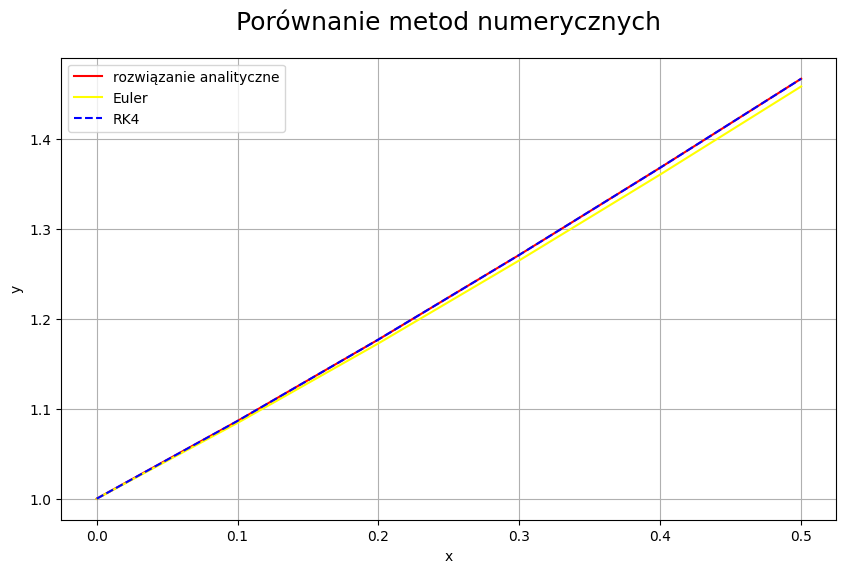

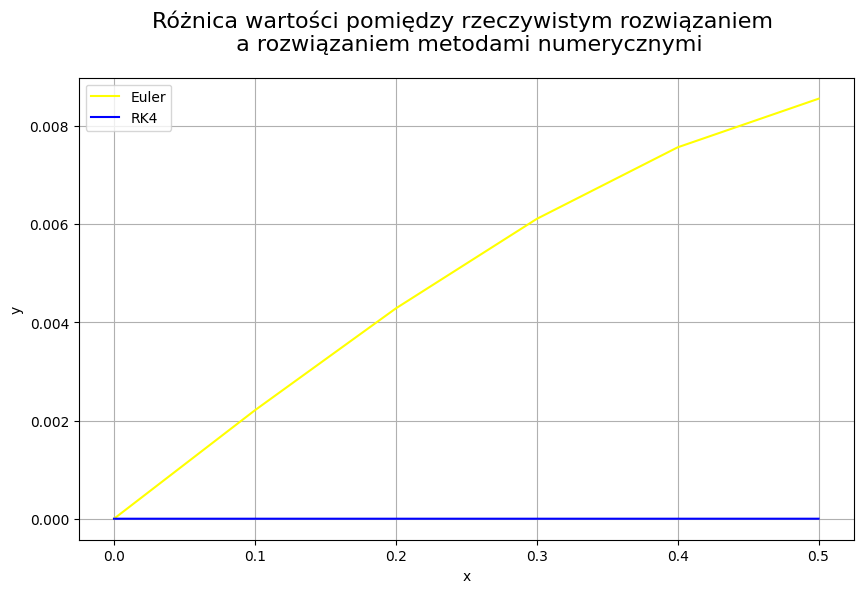

In [4]:
def f(x, y):
    return np.sin(y)


def analytical_solution(x):
    return 2 * np.arctan(np.exp(x) * np.tan(0.5))


h = 0.1
stop = 0.5
n = int(stop // h + 1)
initial_cond = (0, 1)

euler = euler_method(f, initial_cond, h, n)
runge_kutta_4rd_order = runge_kutta_4th_order(f, initial_cond, h, n)
x = np.arange(0, stop + h, h)
solution = analytical_solution(x)

plt.figure(figsize=(10, 6))
plt.plot(x, solution, label="rozwiązanie analityczne", color='red')
plt.plot(*euler, label="Euler", color='yellow')
plt.plot(*runge_kutta_4rd_order, label="RK4", linestyle='--', color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Porównanie metod numerycznych", pad=20, fontsize=18)
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(euler[0], analytical_solution(euler[0]) - euler[1], label="Euler", color='yellow')
plt.plot(runge_kutta_4rd_order[0],analytical_solution(runge_kutta_4rd_order[0]) - runge_kutta_4rd_order[1] , label="RK4", color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Różnica wartości pomiędzy rzeczywistym rozwiązaniem \n a rozwiązaniem metodami numerycznymi", pad=20, fontsize=16)
plt.grid(True)
plt.legend()
plt.show()

#### Wnioski

- Metoda Rungego-Kutty czwartego rzędu (RK4) jest znacznie dokładniejsza niż metoda Eulera. Wynika to z różnicy rzędów błędu globalnego: 
    - Metoda Eulera: błąd globalny rzędu $ O(h) $.
    - Metoda RK4: błąd globalny rzędu $ O(h^4) $.
- Obie metody działają stosunkowo dobrze dla małych wartości $ x $, jednak metoda Eulera szybko wykazuje większe odchylenie od rzeczywistego rozwiązania, zwłaszcza dla większych wartości $ h $.
- Metoda RK4 wymaga więcej obliczeń w każdym kroku, ale w zamian zapewnia znacznie lepszą dokładność. Natomiast metoda Eulera jest prostsza i szybsza, ale mniej precyzyjna.
- Dla małych kroków czasowych $ h $ różnica między metodami jest mniejsza, ale dla większych kroków metoda Eulera szybko traci dokładność.

Podsumowując, jeśli zależy nam na dużej dokładności, powinniśmy używać metody RK4. Jeśli natomiast kluczowe są prostota i szybkość obliczeń, metoda Eulera może być wystarczająca w niektórych zastosowaniach.


### Zadanie 3

#### Równanie ruchu wahadła matematycznego z tłumieniem i siłą wymuszającą

Rozważamy równanie ruchu wahadła matematycznego z tłumieniem i okresową siłą wymuszającą:

$$ \frac{d^2 \theta}{d\tau^2} + \frac{1}{Q} \frac{d\theta}{d\tau} + \sin\theta = \hat{A} \cos(\hat{\omega} \tau) $$

gdzie:
   - $ Q = \frac{mg}{\omega_0 \nu} $ – parametr tłumienia,
   - $ \omega_0 = \sqrt{\frac{g}{l}} $ – częstość drgań własnych wahadła bez tłumienia,
   - $ \hat{\omega} = \frac{\omega}{\omega_0} $ – częstość siły wymuszającej w jednostkach częstości własnej,
   - $ \tau = \omega_0 t $ – czas w jednostkach charakterystycznych,
   - $ \hat{A} = \frac{A}{mg} $ – amplituda siły wymuszającej w jednostkach siły ciężkości.


#### Przekształcenie równania do postaci układu równań pierwszego rzędu

Aby zastosować metodę Rungego-Kutty czwartego rzędu, zamieniamy równanie różniczkowe drugiego rzędu na układ równań pierwszego rzędu. Wprowadzamy zmienne:

 $$ \theta_1 = \theta, \quad \theta_2 = \frac{d\theta}{d\tau} $$
    
Wówczas otrzymujemy układ równań:

$$ \frac{d\theta_1}{d\tau} = \theta_2 $$

$$ \frac{d\theta_2}{d\tau} = -\frac{1}{Q} \theta_2 - \sin\theta_1 + \hat{A} \cos(\hat{\omega} \tau) $$

Rozwiązanie numeryczne wykonamy metodą Rungego-Kutty czwartego rzędu dla trzech przypadków:
   - $ Q = 2 $, $ \hat{\omega} = \frac{2}{3} $, $ \hat{A} = 0.5 $, $ \hat{v}_0 = 0 $, $ \theta_0 = 0.01 $,
   - $ Q = 2 $, $ \hat{\omega} = \frac{2}{3} $, $ \hat{A} = 0.5 $, $ \hat{v}_0 = 0 $, $ \theta_0 = 0.3 $,
   - $ Q = 2 $, $ \hat{\omega} = \frac{2}{3} $, $ \hat{A} = 1.35 $, $ \hat{v}_0 = 0 $, $ \theta_0 = 0.3 $.

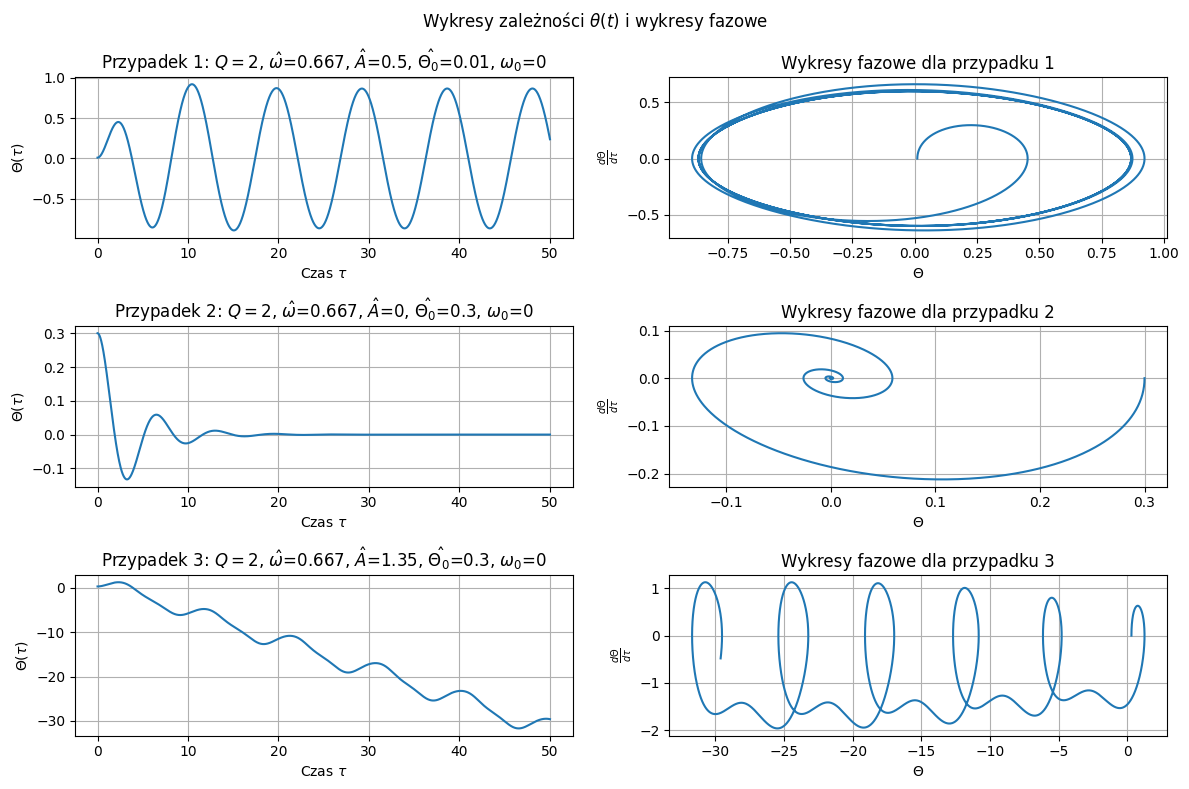

In [5]:
def f1(x, y):
    return y[1]         # y_1'(x) = y_2(x)

def f2(x, y, A_hat=0.5, omega_hat=2/3, Q=2):
    return A_hat * np.cos(omega_hat * x) - 1 / Q * y[1] - np.sin(y[0])      # y_2'(x) = A*cos(omega*x) - 1/Q *y_2(x) - sin(y_1(x))

cases = [
    (2, 2 / 3, 0.5, 0.01, 0),
    (2, 2 / 3, 0, 0.3, 0),
    (2, 2 / 3, 1.35, 0.3, 0)
]

plt.figure(figsize=(12, 8))
plt.suptitle(r"Wykresy zależności $\theta(t)$ i wykresy fazowe")
for i, (Q, omega_hat, A_hat, theta0, omega0) in enumerate(cases):

    f_vector = [f1, lambda x, y: f2(x, y, A_hat=A_hat, omega_hat=omega_hat, Q=Q)]
    func = lambda x, y: np.array([f(x[i], y) for i, f in enumerate(f_vector)])

    initial_cond = [np.array([0, 0]), np.array([theta0, omega0])]
    t_max = 50
    dt = 0.01
    n = int(t_max / dt + 1)

    # Tutaj możemy wykorzystać dowolną metodę, kod zadziała również dla metody Eulera i Runge-Kutty-2
    t_vals, y_vals = runge_kutta_4th_order(func=func, point=initial_cond, h=dt, n=n)
    # t_vals, y_vals = runge_kutta_2nd_order(func=func, point=initial_cond, h=dt, n=n)
    # t_vals, y_vals = euler_method(func=func, point=initial_cond, h=dt, n=n)


    tau = [vect[0] for vect in t_vals]
    theta = [vect[0] for vect in y_vals]

    dtheta_dtau = [vect[1] for vect in y_vals]

    plt.subplot(3, 2, 2 * i + 1)
    plt.plot(tau, theta)
    plt.xlabel(r"Czas $\tau$")
    plt.ylabel(r"$\Theta(\tau)$")
    plt.title(fr"Przypadek {i + 1}: $Q={Q}$," + r" $\hat{\omega}$=" +
              f"{omega_hat:.3f}, " + r"$\hat{A}$" + f"={A_hat}, " +
              r"$\hat{\Theta_0}$" + fr"={theta0}, $\omega_0$={omega0}")
    plt.grid(True)

    plt.subplot(3, 2, 2 * i + 2)
    plt.plot(theta, dtheta_dtau)
    plt.xlabel(r"$\Theta$")
    plt.ylabel(r"$\frac{d\Theta}{d\tau}$")
    plt.title(f"Wykresy fazowe dla przypadku {i + 1}")
    plt.grid(True)

plt.tight_layout()
plt.show()

#### Wnioski

- Dla małych wartości początkowych kąta ($ \theta_0 = 0.01 $) ruch pozostaje regularny i oscylacyjny. Wahadło porusza się zgodnie z przewidywaniami dla niewielkich drgań.
- Gdy siła wymuszająca jest stosunkowo mała ($ \hat{A} = 0.5 $), ruch pozostaje względnie uporządkowany. Jednak dla większej wartości siły wymuszającej ($ \hat{A} = 1.35 $), trajektoria w przestrzeni fazowej staje się chaotyczna, co wskazuje na możliwe występowanie zjawiska chaosu deterministycznego. Gdy siła wymuszająca wynosi 0 ($ \hat{A} = 0 $) mamy do czynienia z drganiami zanikającymi.

Podsumowując, układ wykazuje różne zachowania w zależności od początkowych warunków i siły wymuszającej – od regularnych oscylacji po potencjalnie chaotyczne ruchy dla dużych amplitud wymuszenia.

### Zadanie 4

a) bez oporów powietrza

- Przemieszczenie w poziomie (OX): 
$$m \vec{a_x} = 0$$
$$m \frac{dv_x}{dt} = 0$$
$$m \frac{d^2x}{dt^2} = 0$$
$$ \frac{d^2x}{dt^2} = 0$$

Przekształćmy dane równanie różniczkowe drugiego rzędu do układu dwóch równań różniczkowych pierwszego rzędu. Niech $x_1 = x$, $x_1' = x_2$, wówczas $x_2' = x_1''$ i otrzymamy:

$$
\begin{bmatrix}
x_1' \\
x_2'
\end{bmatrix}
=
\begin{bmatrix}
x_2 \\
0
\end{bmatrix}
$$

- w pionie OY: 
$$ m \frac{d^2 y}{dt^2} = -mg $$
$$ \frac{d^2 y}{dt^2} = -g $$

Ponownie, doprowadźmy równanie do układu dwóch równań różniczkowych. Niech $y = y_1$, $y_1' = y_2$ wówczas $y_2' = y_1''$ i otrzymujemy:


$$
\begin{bmatrix}
y_1' \\
y_2'
\end{bmatrix}
=
\begin{bmatrix}
y_2 \\
-g
\end{bmatrix}
$$


In [6]:
# Stałe
gravity_const = 9.81  # przyspieszenie ziemskie [m/s^2]
rho = 1.2  # gęstość powietrza [kg/m^3]
cw = 0.35  # współczynnik oporu powietrza

cases = [
    (0.45, 0.70),
    (0.35, 0.65),
    (0.30, 0.60),
]

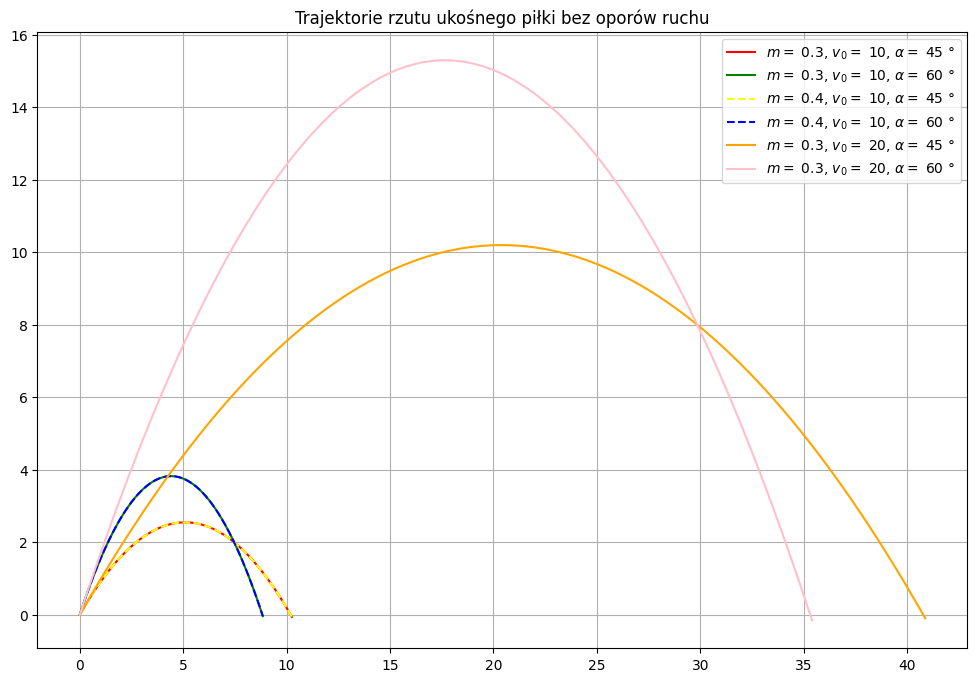

In [7]:
def f1(x, y):
    return y[1]

def f2(x, y, m):
    return 0

def g1(x, y):
    return y[1]

def g2(x, y, m):
    return - gravity_const

cases = [
    (0.30, 10, 45, '-', 'red'),
    (0.30, 10, 60, '-', 'green'),
    (0.40, 10, 45, '--', 'yellow'),
    (0.40, 10, 60, '--', 'blue'),
    (0.30, 20, 45, '-', 'orange'),
    (0.30, 20, 60, '-', 'pink'),
]

plt.figure(figsize=(12, 8))
for i, (m, v0, angle, linestyle, color) in enumerate(cases):
    alpha = angle * np.pi / 180
    t_max = 2 / gravity_const * v0 * np.sin(alpha)
    v0x = v0 * np.cos(alpha)
    v0y = v0 * np.sin(alpha)

    f_vector = [f1, lambda x, y: f2(x, y, m)]
    func1 = lambda x, y: np.array([f(x[i], y) for i, f in enumerate(f_vector)])
    initial_cond1 = [np.array([0, 0]), np.array([0, v0x])]

    g_vector = [g1, lambda x, y: g2(x, y, m)]
    func2 = lambda x, y: np.array([g(x[i], y) for i, g in enumerate(g_vector)])
    initial_cond2 = [np.array([0, 0]), np.array([0, v0y])]

    dt = 0.01
    n = int(t_max / dt + 1)
    tx_vals, x_vals = runge_kutta_4th_order(func=func1, point=initial_cond1, h=dt, n=n)
    ty_vals, y_vals = runge_kutta_4th_order(func=func2, point=initial_cond2, h=dt, n=n)

    x = [vect[0] for vect in x_vals]
    y = [vect[0] for vect in y_vals]

    plt.plot(x, y, label=fr'$m =$ {m}, $v_0 =$ {v0}, $\alpha =$ {angle} $\degree$', linestyle=linestyle, color=color)
plt.title("Trajektorie rzutu ukośnego piłki bez oporów ruchu")
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


b) z oporami powietrza:

- Przemieszczenie w poziomie (OX): 
$$m \vec{a_x} = F_{0x}$$
$$m \frac{dv_x}{dt} = F_{0x}$$
$$m \frac{d^2x}{dt^2} = F_{0x}$$
$$ \frac{d^2x}{dt^2} = \frac{F_{0x}}{m}$$

Przekształćmy dane równanie różniczkowe drugiego rzędu do układu dwóch równań różniczkowych pierwszego rzędu. Niech $x_1 = x$, $x_1' = x_2$, wówczas $x_2' = x_1''$ i otrzymamy:

$$
\begin{bmatrix}
x_1' \\
x_2'
\end{bmatrix}
=
\begin{bmatrix}
x_2 \\
\frac{F_{0x}}{m} 
\end{bmatrix}
$$

- w pionie OY: 
$$ m \frac{d^2 y}{dt^2} = -mg + F_{0y} $$
$$ \frac{d^2 y}{dt^2} = -g + \frac{F_{0y}}{m}  $$

Ponownie, doprowadźmy równanie do układu dwóch równań różniczkowych. Niech $y = y_1$, $y_1' = y_2$ wówczas $y_2' = y_1''$ i otrzymujemy:


$$
\begin{bmatrix}
y_1' \\
y_2'
\end{bmatrix}
=
\begin{bmatrix}
y_2 \\
-g + \frac{F_{0y}}{m} 
\end{bmatrix}
$$

Ogólnie otrzymujemy:

$$
\begin{bmatrix}
x_1' \\
x_2' \\
y_1' \\
y_2' \\
\end{bmatrix}
=
\begin{bmatrix}
x_2 \\
\frac{F_{0x}}{m}  \\
y_2 \\
-g + \frac{F_{0y}}{m} 
\end{bmatrix}
$$

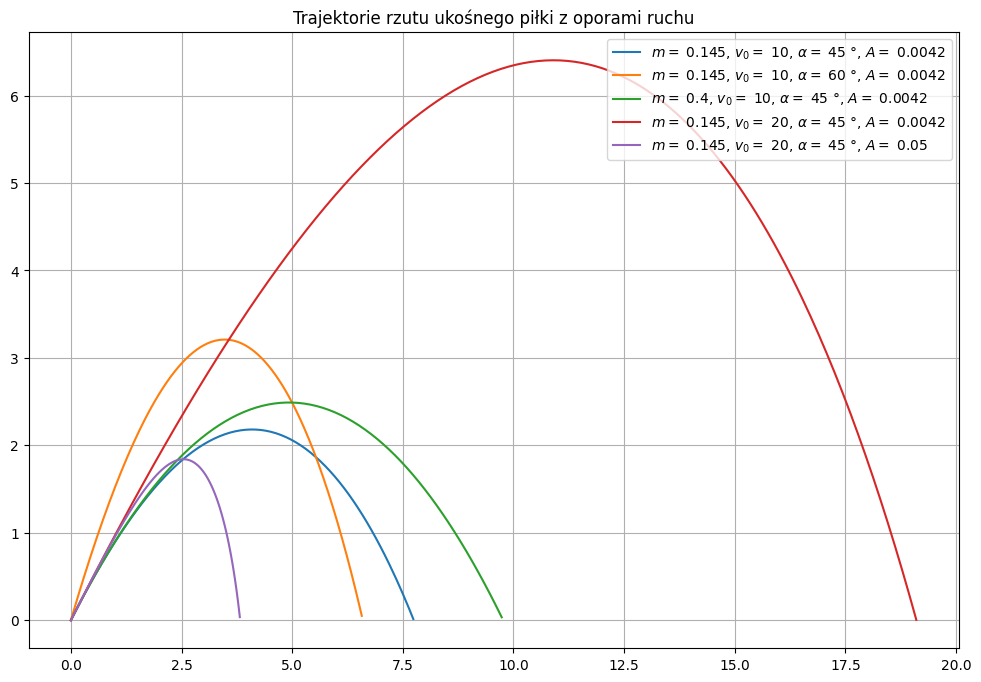

In [8]:
def drag_force(vx, vy, A):
    V = np.sqrt(vx ** 2 + vy ** 2)
    Fd_x = -0.5 * cw * rho * A * V * vx / m
    Fd_y = -0.5 * cw * rho * A * V * vy / m
    return Fd_x, Fd_y

def f_1(t, p, m, A):
    x1, x2, y1, y2 = p
    return x2

def f_2(t, p, m, A):
    x1, x2, y1, y2 = p
    return drag_force(vx=x2, vy=y2, A=A)[0] / m

def f_3(t, p, m, A):
    x1, x2, y1, y2 = p
    return y2

def f_4(t, p, m, A):
    x1, x2, y1, y2 = p
    return - gravity_const + drag_force(vx=x2, vy=y2, A=A)[1] / m


cases = [
    (10, 45, 0.145, 0.0042),
    (10, 60, 0.145, 0.0042),
    (10, 45, 0.4, 0.0042),
    (20, 45, 0.145, 0.0042),
    (20, 45, 0.145, 0.05),
]


plt.figure(figsize=(12, 8))
for v0, angle, m, A in cases:
    alpha = angle * np.pi / 180

    v = np.array([v0 * np.cos(alpha), v0 * np.sin(alpha)])
    F0 = drag_force(v[0], v[1], A)
    F0x, F0y = F0

    f_vector = [f_1, f_2, f_3, f_4]
    func = lambda t, p: np.array([f(t[i], p, m, A) for i, f in enumerate(f_vector)])
    initial_cond = [np.array([0, 0, 0, 0]), np.array([0, v[0], 0, v[1]])]

    dt = 0.01
    t_max = 3
    n = int(t_max / dt + 1)
    t_vals, p_vals = runge_kutta_4th_order(func=func, point=initial_cond, h=dt, n=n)

    p_vals = list(filter(lambda vect: vect[2] >= 0, p_vals))
    x_vals = [vect[0] for vect in p_vals]
    y_vals = [vect[2] for vect in p_vals]


    plt.plot(x_vals, y_vals, label=fr'$m =$ {m}, $v_0 =$ {v0}, $\alpha =$ {angle} $\degree$, $A =$ {A}')
plt.title("Trajektorie rzutu ukośnego piłki z oporami ruchu")
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

### Zadanie 5

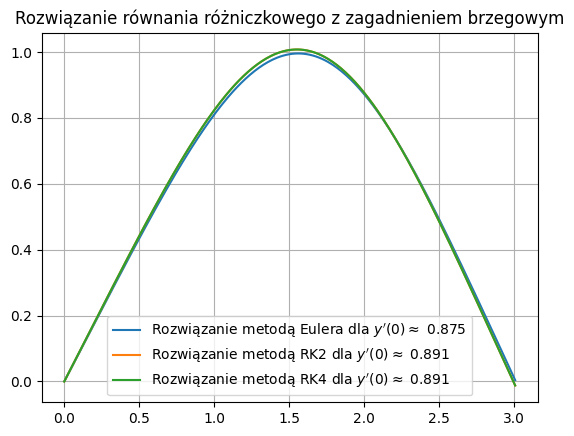

In [9]:
def shooting_method(func, b_cond, a_part, h=10 ** 5 + 1, epsilon=0.001, method=euler_method):
    """
    :param func: funkcja f(x, y)
    :param b_cond: warunkek brzegowy zadany w postaci: [(x_0, y(x_0)), (x_1, y(x_1))]
    :param rng: przedział, dla jakiego chcemy mieć tablicę wartości funkcji x
    :param a_part: przedział, z którego będziemy szukać odpowiedniego parametru c
    :param h: podział przedziału (krok)
    :param epsilon: parametr, który określa nam dokładność, z jaką chcemy rozwiązać warunek brzegowy
    :return: c, gdzie c jest wartością y'(x_0)
    """
    # sprawdzanie wartości na krańcach przedziału. Szukanie c metodą bisekcji
    n = int(b_cond[1][0] / h + 1)
    a = method(func = func, point = [np.array([b_cond[0][0], b_cond[0][0]]), np.array([b_cond[0][1], a_part[0]])], h=h, n=n)[1][-1][0] - b_cond[1][1]
    b = method(func = func, point = [np.array([b_cond[0][0], b_cond[0][0]]), np.array([b_cond[0][0], a_part[1]])], h = h, n = n)[1][-1][0] - b_cond[1][1]

    if a * b >= 0:
        raise Exception("Dobierz inny przedział a_part")
    while True:
        c = (a_part[1] + a_part[0]) / 2
        p = method(func=func, point=[np.array([b_cond[0][0], b_cond[0][0]]), np.array([b_cond[0][0], c])], h = h, n = n)
        q = p[1][-1][0] - b_cond[1][1]
        if abs(q) <= epsilon:
            return c
        else:
            if a * q > 0:
                a_part = (c, a_part[1])
            elif a * q < 0:
                a_part = (a_part[0], c)
                
h = 0.01
boundary_conditions = [(0, 0), (np.pi / 2, 1)]

def f1(x, y):
    y1, y2 = y
    return y2

def f2(x, y):
    y1, y2 = y
    return - (1 + 0.2 * x) * y1 ** 2

f_vector = [f1, f2]
func = lambda x, y: np.array([f(x[i], y) for i, f in enumerate(f_vector)])
parting = (-1, 3)

c1 = shooting_method(func=func, b_cond = boundary_conditions, a_part=parting, h=h, epsilon=0.01, method=euler_method)
c2 = shooting_method(func=func, b_cond = boundary_conditions, a_part=parting, h=h, epsilon=0.01, method=runge_kutta_2nd_order)
c3 = shooting_method(func=func, b_cond = boundary_conditions, a_part=parting, h=h, epsilon=0.01, method=runge_kutta_4th_order)
initial_conditions_1 = [np.array([0, 0]), np.array([0, c1])]
initial_conditions_2 = [np.array([0, 0]), np.array([0, c2])]
initial_conditions_3 = [np.array([0, 0]), np.array([0, c3])]

x_max = 3.0
n = int(x_max / h + 1)

x_vals_1, y_vals_1 = euler_method(func=func, point=initial_conditions_1, h=h, n=n)
x_vals_2, y_vals_2 = euler_method(func=func, point=initial_conditions_2, h=h, n=n)
x_vals_3, y_vals_3 = euler_method(func=func, point=initial_conditions_3, h=h, n=n)

x1 = [vect[0] for vect in x_vals_1]
y1 = [vect[0] for vect in y_vals_1]

x2 = [vect[0] for vect in x_vals_2]
y2 = [vect[0] for vect in y_vals_2]

x3 = [vect[0] for vect in x_vals_3]
y3 = [vect[0] for vect in y_vals_3]

plt.plot(x1, y1, label=rf"Rozwiązanie metodą Eulera dla $y'(0) \approx$ {round(c1, 3)}")
plt.plot(x2, y2, label=rf"Rozwiązanie metodą RK2 dla $y'(0) \approx$ {round(c2, 3)}")
plt.plot(x3, y3, label=rf"Rozwiązanie metodą RK4 dla $y'(0) \approx$ {round(c3, 3)}")
plt.title("Rozwiązanie równania różniczkowego z zagadnieniem brzegowym")
plt.legend()
plt.grid(True)
plt.show()